In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle

from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree

from data_process import load_data, data_preprocessor
from testing import test_model


### Loading the data

In [7]:
file_path = "../data/accepted_2007_to_2018Q4.csv"

data = load_data(file_path)

X = data.drop(columns=['loan_status'])
y = data['loan_status']

X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

### Preprocessing the data

In [9]:
preprocessor = data_preprocessor(X_train_df)

X_train = preprocessor.fit_transform(X_train_df)
X_test = preprocessor.transform(X_test_df)

### Initializing the models

In [10]:
models = {
    "Logistic Regression": linear_model.LogisticRegression(),
    "Decision Tree (max_depth = 5)": tree.DecisionTreeClassifier(max_depth=5),
    "Decision Tree (max_depth = 10)": tree.DecisionTreeClassifier(max_depth=10),
    "Decision Tree (max_depth = 15)": tree.DecisionTreeClassifier(max_depth=15),
    "XGBoost": xgb.XGBClassifier()
}

### Training the models

In [11]:
for model in models.values():
    model.fit(X_train, y_train)

### Testing the models

#### On the training set

In [20]:
results = []

for name, model in models.items():
    model_res = test_model(model, X_train, y_train)
    model_res = {"model": name, **model_res}

    results.append(model_res)

results_df = pd.DataFrame(results)

results_df

,model,accuracy,sensitivity,specificity,AUC
0,Logistic Regression,0.998436,0.993509,0.999834,0.999527
1,Decision Tree (max_depth = 5),0.975500,0.911948,0.993531,0.976423
2,Decision Tree (max_depth = 10),0.990412,0.960710,0.998839,0.997477
3,Decision Tree (max_depth = 15),0.997736,0.990453,0.999803,0.999339
4,XGBoost,0.999896,0.999528,1.000000,1.000000


#### On the testing set

In [21]:
results = []

for name, model in models.items():
    model_res = test_model(model, X_test, y_test)
    model_res = {"model": name, **model_res}

    results.append(model_res)

results_df = pd.DataFrame(results)

results_df

,model,accuracy,sensitivity,specificity,AUC
0,Logistic Regression,0.998249,0.992913,0.999777,0.999354
1,Decision Tree (max_depth = 5),0.974392,0.908979,0.993115,0.975557
2,Decision Tree (max_depth = 10),0.989800,0.958585,0.998735,0.997054
3,Decision Tree (max_depth = 15),0.997049,0.988817,0.999405,0.998423
4,XGBoost,0.999682,0.998570,1.000000,0.999966


### Saving the models

In [17]:
for name, model in models.items():
    file_name = name.replace(" ", "_").lower()
    with open(f"../models/{file_name}.pkl", "wb") as f:
        pickle.dump(model, f)

### Decision Tree visualisation

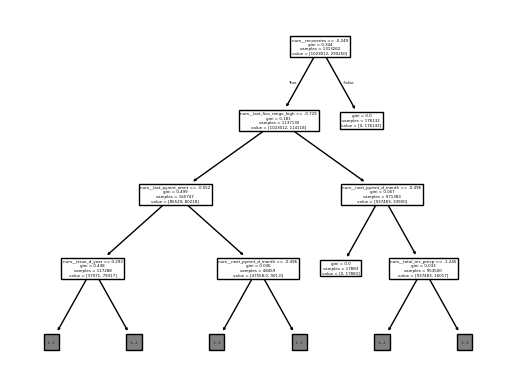

In [18]:
decision_tree = models["Decision Tree (max_depth = 5)"]

tree.plot_tree(decision_tree, max_depth=3, feature_names=preprocessor.get_feature_names_out())
plt.show()